In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

In [3]:
%cd C:/Users/Juliet/Desktop/ADS

C:\Users\Juliet\Desktop\ADS


In [4]:
#This file has edited out int, both rank values, and grossw and then group by movie name
#This allows for a much smaller dataset and elimates data we would not have access to before a movie release

movie= pd.read_csv('movieedit.csv', header=0, sep=',')

In [5]:
movie.head(3)

,MovieName,Avg_GrossW,Metascore,Meta_Pos_Count,Meta_Neut_Count,Meta_Neg_Count,User_Score,User_Pos_Count,User_Neut_Count,User_Neg_Count,Runtime_Value,Rated
0,'71,127085,83,32,2,0,7.5,119,2,6,99,7
1,10 Cloverfield Lane,6006917,76,38,3,2,7.7,796,3,2,104,7
2,10 Items or Less,27764,54,9,8,3,5.6,4,1,3,82,3


In [6]:
# Initialize X and Y
X = movie.drop(['MovieName','Avg_GrossW'], axis=1)
Y = pd.DataFrame(movie[['Avg_GrossW']])

# Check shape
print (f'Shape of X: {X.shape}')
print (f'Shape of Y: {Y.shape}')

# Split data into test, train, and validation sets
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, train_size=0.9)
X_test, X_val, Y_test, Y_val = sklearn.model_selection.train_test_split(X_test, Y_test, test_size=0.5)

# Check split dimensions
print('Training:',len(X_train))
print('Validation:', len(X_val))
print('Test:', len(X_test))

Shape of X: (4710, 10)
Shape of Y: (4710, 1)
Training: 4239
Validation: 236
Test: 235


In [7]:
# Fit Linear Regression
linear_reg = LinearRegression().fit(X_train, Y_train)

# Obtain Coefficient of Determination
r_sq = linear_reg.score(X_train, Y_train)
print(f'Coefficient of Determination: {r_sq}')
print(f'intercept: {linear_reg.intercept_}')
print(f'slope: {linear_reg.coef_}')

Coefficient of Determination: 0.31728957453293294
intercept: [378534.35219031]
slope: [[ -42541.54025927   89981.68188259  197788.38934463   61786.14209896
  -124846.45968642    7032.95172115   48482.91572898    1824.42908274
    17718.86701823 -242131.7231482 ]]


In [8]:
linear_reg_pred1 = linear_reg.predict(X_val)
linear_reg_pred2 = linear_reg.predict(X_test)

# Accuracy and Classication
print('Linear Regression Model')
print(f'Accuracy Score {r2_score(Y_test, linear_reg_pred2)}')

Linear Regression Model
Accuracy Score 0.20076613359134166


In [9]:
import s3fs
import pickle
import tarfile
import xgboost

model_path = 'C:/Users/Juliet/Desktop/ADS/model.tar.gz'

file = tarfile.open(model_path)
with tarfile.open(model_path, mode='r') as tar_f:
        with tar_f.extractfile('xgboost-model') as extracted_f:
            xgbooster = pickle.load(extracted_f)

scores = xgbooster.get_fscore()
scores

C:\Users\Juliet\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[11:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


{'f0': 195.0,
 'f1': 110.0,
 'f2': 93.0,
 'f3': 82.0,
 'f4': 55.0,
 'f5': 86.0,
 'f6': 107.0,
 'f7': 73.0,
 'f8': 67.0,
 'f9': 110.0,
 'f10': 31.0}

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='features'>

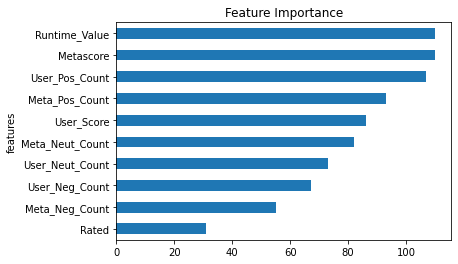

In [10]:
# Plot them
features = X.columns
importance=np.array([0]*len(features))
for score in scores:
    num = score[1:]
    importance[int(num) - 1] = scores[score]
feature_importance = pd.DataFrame({ 'features': features ,'score': importance}).sort_values('score')
feature_importance.plot.barh(x='features',title='Feature Importance',legend=False)


In [11]:
# Load predictions
Y_pred = pd.read_csv('C:/Users/Juliet/Desktop/ADS/test.csv.out', header=None)

Text(0.5, 1.0, 'Median GrossW vs Predicted GrossW')

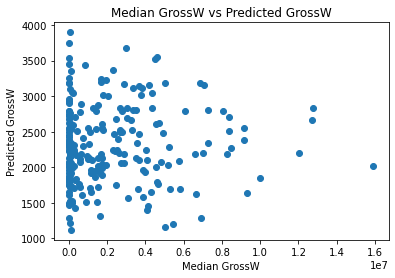

In [12]:
# Visualize the predictions vs the true values
plt.scatter(Y_test, Y_pred)
plt.xlabel("Median GrossW")
plt.ylabel("Predicted GrossW")
plt.title("Median GrossW vs Predicted GrossW")

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

...
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3)
# evaluate model
scores = cross_val_score(xgbooster.fit(self, X, Y), X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

AttributeError: 'Booster' object has no attribute 'fit'

In [46]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, Y_pred))

-0.5929597545242264
